# S&P 500 Data Analysis and Preprocessing

This notebook focuses on analyzing historical S&P 500 index data obtained using the `yfinance` library. The workflow includes:

- **Data Acquisition:**  
    The S&P 500 data (`sp500`) is downloaded for the period from May 23, 2022, to May 22, 2025. The dataset contains daily values for Close, High, Low, Open, and Volume.

- **Data Preprocessing:**  
    A new DataFrame (`trimmed_data`) is created to focus on the 'Close' price. The daily log returns are calculated to analyze the percentage change in closing prices, which is a common step in financial time series analysis.  
    Missing values resulting from the log return calculation are identified and can be handled as needed.

- **Exploratory Analysis:**  
    The notebook provides an overview of the data structure, types, and summary statistics, setting the stage for further analysis or modeling.

This structured approach ensures the data is clean and ready for subsequent financial analysis or predictive modeling tasks.

# Documentation for the S&P 500 Dataset

## S&P 500 Dataset Overview

This dataset contains historical daily data for the S&P 500 index, retrieved using the `yfinance` library. The data spans from May 23, 2022, to May 22, 2025, and is indexed by date.

### Features

- **Close:** The closing price of the S&P 500 index for each trading day.  
- **High:** The highest price reached by the S&P 500 index during the trading day.  
- **Low:** The lowest price reached by the S&P 500 index during the trading day.  
- **Open:** The opening price of the S&P 500 index at the start of the trading day.  
- **Volume:** The total number of shares traded for all the constituent stocks in the S&P 500 index during the trading day.

> **Note:**  
> The columns are multi-indexed as `(Feature, ^GSPC)` due to the data structure returned by `yfinance`.

### Preprocessed Data

- The `trimmed_data` DataFrame focuses on the 'Close' price and contains the daily log returns, which represent the percentage change in closing prices from one day to the next.  
- Log returns are commonly used in financial analysis for their statistical properties.  
- The first row contains a `NaN` value due to the nature of the log return calculation.

### Example Data

#### `sp500` DataFrame (first 5 rows):

| Date       | (Close, ^GSPC) | (High, ^GSPC) | (Low, ^GSPC) | (Open, ^GSPC) | (Volume, ^GSPC) |
|------------|----------------|---------------|--------------|---------------|-----------------|
| 2022-05-23 | 3973.75        | 3981.88       | 3909.04      | 3919.42       | 4420030000      |
| 2022-05-24 | 3941.48        | 3955.68       | 3875.13      | 3942.94       | 4923190000      |
| 2022-05-25 | 3978.73        | 3999.33       | 3925.03      | 3929.59       | 4802560000      |
| 2022-05-26 | 4057.84        | 4075.14       | 3984.60      | 3984.60       | 4709970000      |
| 2022-05-27 | 4158.24        | 4158.49       | 4077.43      | 4077.43       | 4375620000      |

#### `trimmed_data` DataFrame (first 5 rows):

| Date       | (Close, ^GSPC) |
|------------|----------------|
| 2022-05-23 | NaN            |
| 2022-05-24 | -0.008154      |
| 2022-05-25 | 0.009406       |
| 2022-05-26 | 0.019688       |
| 2022-05-27 | 0.024441       |

### Usage

This dataset is suitable for time series analysis, financial modeling, and exploratory data analysis related to the S&P 500 index.

In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load S&P 500 data (^GSPC)
sp500 = yf.download('^GSPC', start='2022-05-23', end='2025-05-23')

# Display the first few rows of the S&P 500 data
display(sp500.head())


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2022-05-23,3973.750000,3981.879883,3909.040039,3919.419922,4420030000
2022-05-24,3941.479980,3955.679932,3875.129883,3942.939941,4923190000
2022-05-25,3978.729980,3999.330078,3925.030029,3929.590088,4802560000
2022-05-26,4057.840088,4075.139893,3984.600098,3984.600098,4709970000
2022-05-27,4158.240234,4158.490234,4077.429932,4077.429932,4375620000


In [29]:
type(sp500)

pandas.core.frame.DataFrame

In [30]:
trimmed_data = sp500[['Close']].copy()

In [31]:
trimmed_data.head()

Price,Close
Ticker,^GSPC
Date,
2022-05-23,3973.750000
2022-05-24,3941.479980
2022-05-25,3978.729980
2022-05-26,4057.840088
2022-05-27,4158.240234


In [32]:
trimmed_data.index

DatetimeIndex(['2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-31', '2022-06-01', '2022-06-02',
               '2022-06-03', '2022-06-06',
               ...
               '2025-05-09', '2025-05-12', '2025-05-13', '2025-05-14',
               '2025-05-15', '2025-05-16', '2025-05-19', '2025-05-20',
               '2025-05-21', '2025-05-22'],
              dtype='datetime64[ns]', name='Date', length=753, freq=None)

In [33]:
trimmed_data.columns

MultiIndex([('Close', '^GSPC')],
           names=['Price', 'Ticker'])

In [34]:
trimmed_data.head()

Price,Close
Ticker,^GSPC
Date,
2022-05-23,3973.750000
2022-05-24,3941.479980
2022-05-25,3978.729980
2022-05-26,4057.840088
2022-05-27,4158.240234


In [35]:
trimmed_data['log_close'] = np.log(trimmed_data['Close'] / trimmed_data['Close'].shift(1))

In [36]:
trimmed_data.head()

Price,Close,log_close
Ticker,^GSPC,
Date,,
2022-05-23,3973.750000,NaN
2022-05-24,3941.479980,-0.008154
2022-05-25,3978.729980,0.009406
2022-05-26,4057.840088,0.019688
2022-05-27,4158.240234,0.024441


In [81]:
trimmed_data.tail()

Price,Close,log_close
Ticker,^GSPC,
Date,,
2025-05-16,5958.379883,0.006981
2025-05-19,5963.600098,0.000876
2025-05-20,5940.459961,-0.003888
2025-05-21,5844.609863,-0.016267
2025-05-22,5842.009766,-0.000445


In [37]:
trimmed_data.isnull().sum()

Price      Ticker
Close      ^GSPC     0
log_close            1
dtype: int64

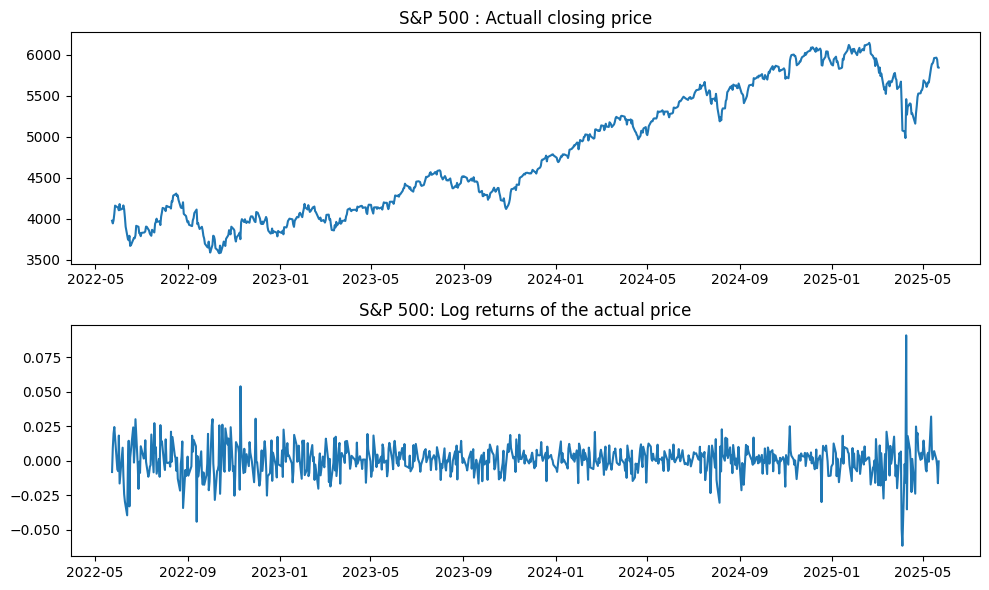

In [38]:
# Plotting the actual price and log returns
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(trimmed_data["Close"], label = "actuall closing price over the time ")
plt.title("S&P 500 : Actuall closing price")

plt.subplot(2, 1, 2)
plt.plot(trimmed_data["log_close"], label = "Log returns of the data")
plt.title("S&P 500: Log returns of the actual price")
plt.tight_layout()
plt.show()

In [39]:
# Checking stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(trimmed_data["log_close"].dropna())
print(f"ADF statistic: {result[0]}")
print(f"P-value: {result[1]}")

ADF statistic: -15.379446120684616
P-value: 3.42319010024073e-28


*Since the ADF shows that the data is stationary, Now shall check components of it to make sure the test is rather true*

In [40]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(trimmed_data["log_close"].dropna())
print(f"Arch Test p-value: {arch_test[1]}")

Arch Test p-value: 1.2154734853282175e-17


Since there is evidence of changing variance is there and we know for the data to be stationary, it shall have constant variance. Though we shall check the variannce seperately

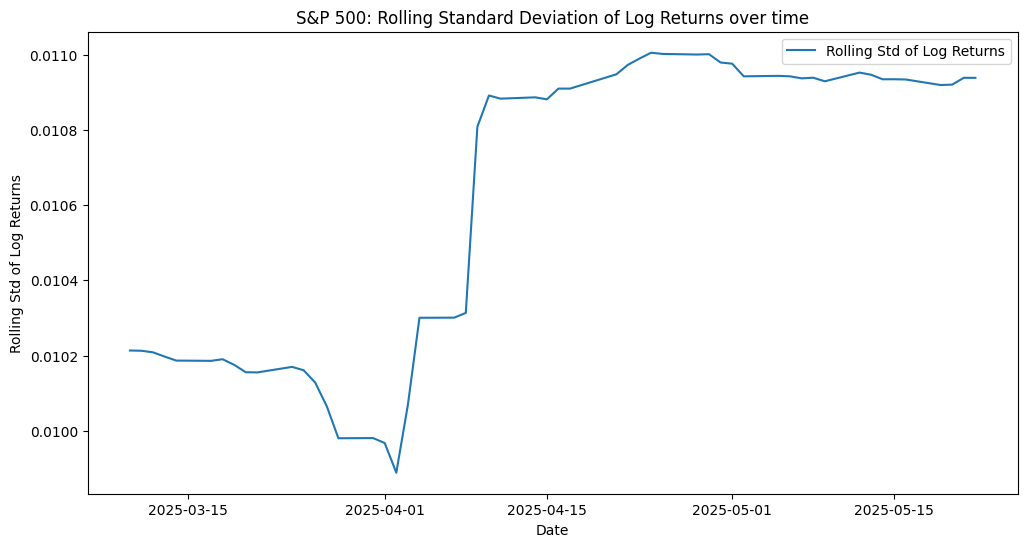

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(trimmed_data.index, trimmed_data["log_close"].rolling(window=700).std(), label="Rolling Std of Log Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Std of Log Returns")
plt.title("S&P 500: Rolling Standard Deviation of Log Returns over time")
# plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decomposition(data, period, width=10, height=8):
    decomposed = seasonal_decompose(data, model='additive', period=period)
    fig = decomposed.plot()
    fig.set_size_inches(width, height)
    plt.show()

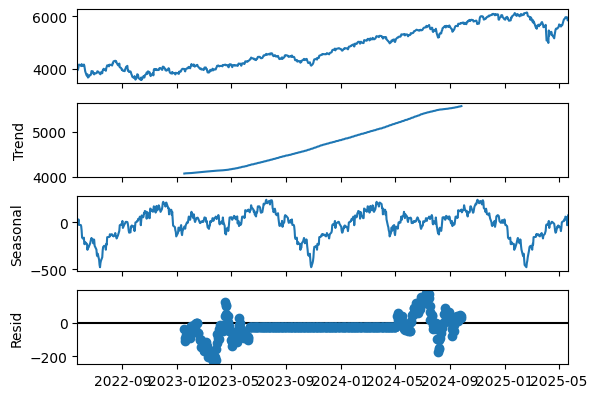

In [53]:
plot_seasonal_decomposition(trimmed_data["Close"].dropna(), period=326, height=4, width=6)

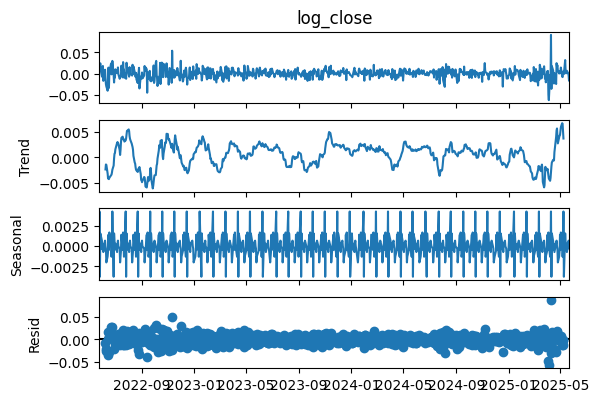

In [83]:
plot_seasonal_decomposition(trimmed_data["log_close"].dropna(), period=20, width=6, height=4)

In [59]:
# Checking for Trend Specifically in Log Returns
import pymannkendall as mk
result = mk.original_test(trimmed_data["log_close"].dropna())
print(f"Trend Test p-value: {result}")

Trend Test p-value: Mann_Kendall_Test(trend='no trend', h=False, p=0.2953120956591002, z=1.0465393314031362, Tau=0.025505000424965295, s=7202.0, var_s=47345042.666666664, slope=1.8094640513006797e-06, intercept=5.1458834857091764e-05)


#### Note:
**These above tests and windowing Visuals depict that the data doesn't have a strong trend. rather a very weak one**

*Points to note is that the Pymannkendall is good with indentifying the monotonic trend, Since here we dont have a monotonic trend present, But that does not mean that there is no trend*

**Interpretation of the test**
- No monotonic trend is present, but linear trend present possibly.
- This doesn't mean no trend at all, just no consistently increasing or decreasing trend.
- The data may still have cyclical, seasonal, or non-monotonic trends that Mann-Kendall doesn’t detect.

In [66]:
# performing a linear trend test on the log returns
import statsmodels.api as sm

ts = trimmed_data["log_close"].dropna()

time_index = np.arange(len(ts))

X = sm.add_constant(time_index)  # Adding a constant for the intercept
y = ts.values

model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04966
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.824
Time:                        13:07:12   Log-Likelihood:                 2306.1
No. Observations:                 752   AIC:                            -4608.
Df Residuals:                     750   BIC:                            -4599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.430      0.6

### Interpretation of the AboveTest:

✅ Interpretation
**x1 (slope coefficient):** 4.224e-07

- A very small positive slope, implying an almost flat trend.

**p-value for x1:** 0.824

High p-value > 0.05 → The slope is not statistically significant.

✅ This means: no evidence of a linear trend in the data.

**R-squared: 0.000**

- The model explains 0% of the variation in the data → no meaningful fit.

**Durbin-Watson:** 2.000

- Indicates no autocorrelation in residuals (this is good).

**Jarque-Bera (JB)**: 1932.293, **Kurtosis:** 10.837

- High kurtosis → heavy-tailed residuals.

- Distribution of residuals is not normal, which is common for financial return data.


#### Conclusion
- ✅ No linear trend is detected in your data.

- Your data (likely log returns) is already detrended.

- This aligns with financial theory — returns tend to be mean-reverting and stationary.

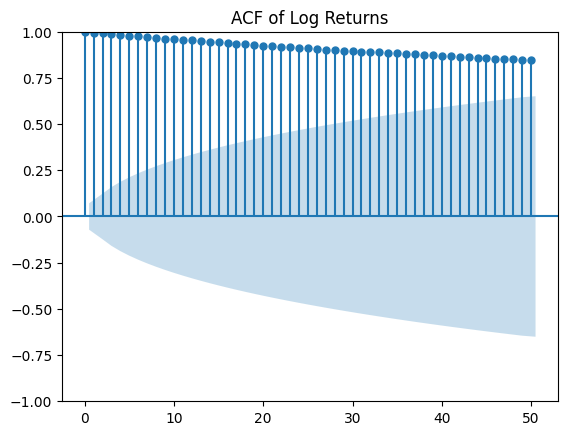

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(trimmed_data["Close"].dropna(), lags=50, title='ACF of Log Returns')
# plot_pacf(trimmed_data["log_close"].dropna(), lags=12, title='PACF of Log Returns')
plt.show()

### Autocorrelation Analysis

The autocorrelation function (ACF) plot of the log returns shows that most autocorrelations fall within the confidence bounds and quickly decay to zero. This indicates that there is no significant seasonality or repeating pattern present in the log returns of the S&P 500 data. The absence of strong autocorrelation at regular lags supports the conclusion that the series is largely random and does not exhibit seasonal behavior.

### Note:

- From the above results you would've seen that the Data still has some Varinace fluctuations annd is not consistent over time addressing for volitality.
- It's Suggested that no more further transformations should be done on the data itself.

**Why You Shouldn’t Forcefully Remove Volatility or fluctuating varaince**
- Trying to remove it through further transformation (e.g., power transforms like Box-Cox) may:

    - Obscure meaningful information,

    - Not succeed in making variance constant,

    - Make the data non-interpretable.

### Conclusion

By the above results we can conclude that there is no Trend, Variance is not moving that much but it poses heteroskedasticity (volatility) in data.

#### Final Assesment
- Constant Mean (No Trend, Log returns --> mean ~ stable)
- Constant Variance (Observed heteroskedasticity, So variance is not fully constant)
- constant Covariance (Mostly)



**Remarks**

- The data is close to weak stationarity, but not strictly weakly stationary due to heteroskedasticity.

- This is very common in financial return series like S&P 500.

- That’s why models like ARIMA+GARCH are used: ARIMA captures the conditional mean, GARCH handles the conditional variance.


**Suggested Models:**

 1. ARIMA + GARCH
 2. ARMA + EGARCH
 3. ARMA + GJR-GARCH
 4. ARFIMA + GARCH 
